In [ ]:
# Artefact

Shape: (9240, 37)
Accuracy Score: 0.924956369982548

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      1046
           1       0.93      0.88      0.90       673

    accuracy                           0.92      1719
   macro avg       0.93      0.92      0.92      1719
weighted avg       0.93      0.92      0.92      1719



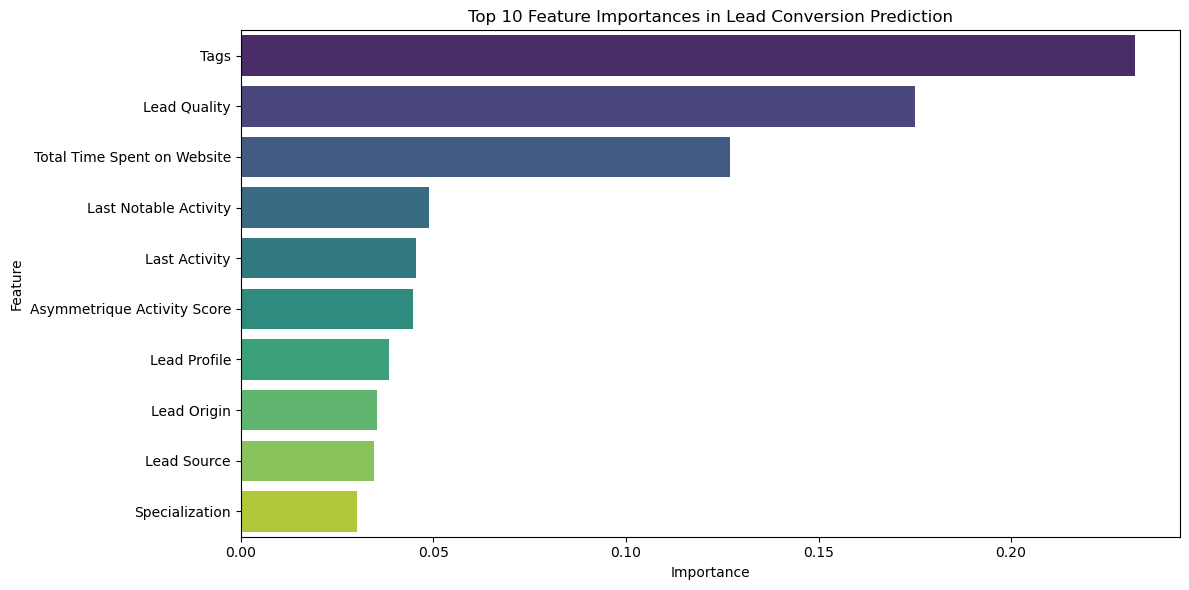

In [1]:
# Lead Conversion Prediction - Artefact

# Step 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset
df = pd.read_csv("archive.csv")

# Step 3: View data structure
print("Shape:", df.shape)
df.head()

# Step 4: Drop ID columns (non-predictive)
df = df.drop(columns=['Prospect ID', 'Lead Number'])

# Step 5: Handle missing values (fill or drop)
df = df.dropna(thresh=int(0.7 * df.shape[1]))  # Drop rows with >30% missing
df = df.fillna("Unknown")  # Fill remaining with 'Unknown'

# Step 6: Encode categorical features
categorical_cols = df.select_dtypes(include='object').columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # store encoder for inverse transform if needed

# Step 7: Define features and target
X = df.drop("Converted", axis=1)
y = df["Converted"]

# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 10: Evaluate model
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 11: Feature Importance Plot
importances = model.feature_importances_
feat_names = X.columns
feat_df = pd.DataFrame({"Feature": feat_names, "Importance": importances})
feat_df = feat_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feat_df.head(10), x="Importance", y="Feature", palette="viridis")
plt.title("Top 10 Feature Importances in Lead Conversion Prediction")
plt.tight_layout()
plt.show()


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy: 0.847585805700989
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      1046
           1       0.82      0.78      0.80       673

    accuracy                           0.85      1719
   macro avg       0.84      0.84      0.84      1719
weighted avg       0.85      0.85      0.85      1719



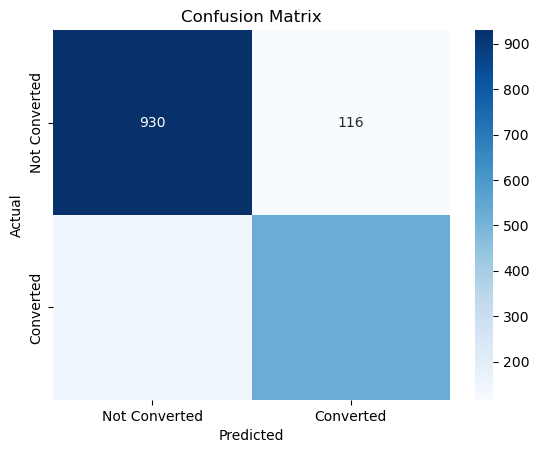


Predictions for First 10 Records:

   Predicted  Actual
0          1       0
1          0       0
2          1       1
3          0       0
4          1       1
5          0       0
6          1       1
7          0       0
8          0       0
9          0       0


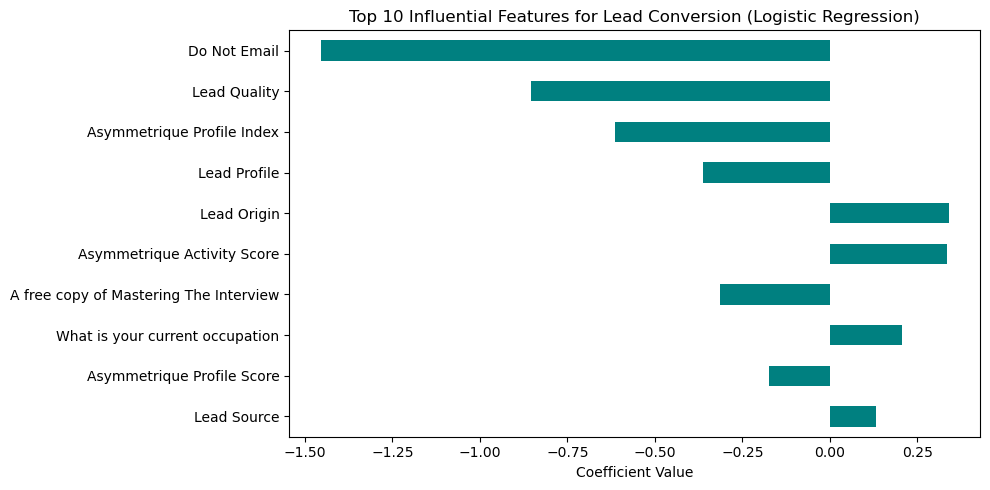

In [8]:
#Another demo of artefact
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load Dataset
df = pd.read_csv('archive.csv')

# Step 3: Drop ID columns
df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

# Step 4: Handle Missing Data
df = df.dropna(thresh=int(df.shape[1] * 0.7))  # Remove rows with >30% missing
df = df.fillna('Unknown')  # Fill rest with placeholder

# Step 5: Encode Categorical Variables
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Step 6: Define Features and Target
X = df.drop('Converted', axis=1)
y = df['Converted']

# Step 7: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 9: Predict and Evaluate
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 10: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 11: Display Predictions for First 10 Samples
predictions = model.predict(X.head(10))
results = pd.DataFrame({'Predicted': predictions, 'Actual': y.head(10).values})
print("\nPredictions for First 10 Records:\n")
print(results)

# Step 12: Show Top Influential Features
coefficients = pd.Series(model.coef_[0], index=X.columns)
top_features = coefficients.sort_values(key=abs, ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_features.plot(kind='barh', color='teal')
plt.title("Top 10 Influential Features for Lead Conversion (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


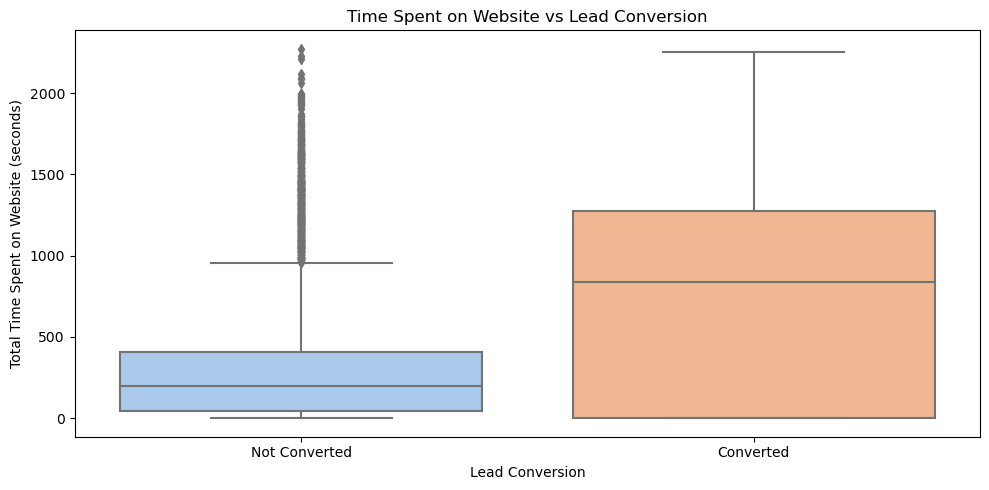

In [5]:
# Time spent vs conversion
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Converted', y='Total Time Spent on Website', palette='pastel')
plt.title("Time Spent on Website vs Lead Conversion")
plt.xticks([0, 1], ['Not Converted', 'Converted'])
plt.ylabel("Total Time Spent on Website (seconds)")
plt.xlabel("Lead Conversion")
plt.tight_layout()
plt.show()
